![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Imbalanced data

We will be using the `files_for_lab/customer_churn.csv` dataset to build a churn predictor.

### Instructions

1. Load the dataset and explore the variables.
2. We will try to predict variable `Churn` using a logistic regression on variables `tenure`, `SeniorCitizen`,`MonthlyCharges`.
3. Extract the target variable.
4. Extract the independent variables and scale them.
5. Build the logistic regression model.
6. Evaluate the model.
7. Even a simple model will give us more than 70% accuracy. Why?
8. **Synthetic Minority Oversampling TEchnique (SMOTE)** is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply `imblearn.over_sampling.SMOTE` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?
9. **Tomek links** are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply `imblearn.under_sampling.TomekLinks` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

**Load the dataset and explore the variables.**

In [2]:
data = pd.read_csv("files_for_lab/customer_churn.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Extract the target variable.**


In [4]:
y = data['Churn']

**Extract the independent variables and scale them.**  

* For this, we will normalize tenure and MonthlyCharges, and then concatenate SeniorCitizen, as it is a boolean 

In [5]:
X = data[['tenure','MonthlyCharges']]

transformer = Normalizer()
transformer.fit(X)
x_normalized = transformer.transform(X)

x_normalized = pd.DataFrame(x_normalized, columns =['tenure','MonthlyCharges'])

X= pd.concat([x_normalized,data['SeniorCitizen']],axis = 1)
X


,tenure,MonthlyCharges,SeniorCitizen
0,0.033482,0.999439,0
1,0.512610,0.858622,0
2,0.037115,0.999311,0
3,0.728628,0.684910,0
4,0.028277,0.999600,0
...,...,...,...
7038,0.272322,0.962206,0
7039,0.572182,0.820127,0
7040,0.348346,0.937366,0
7041,0.053686,0.998558,1


**Build the logistic regression model.**

In [6]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.4, random_state=40)

classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=40,
                  multi_class='ovr').fit(X_train, y_train)

predictions = classification.predict(X_test)

**Evaluate the model.**

In [7]:
accuracy_score(y_test, predictions)

0.7732434350603264

**Even a simple model will give us more than 70% accuracy. Why?**

* Because the two possible outcomes are highly unbalanced, as we can see in the graph 

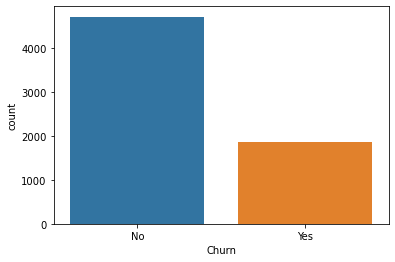

In [18]:
sns.countplot(x=y);

**Oversampling**

Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

* This is a view of the distribution of yes/no before the supersampling process:

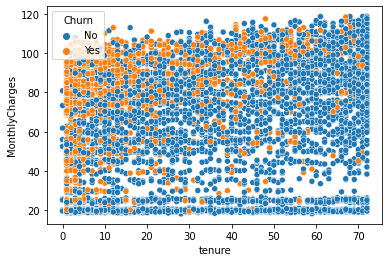

In [26]:
sns.scatterplot(data = data, x='tenure', y='MonthlyCharges',hue = y);

* We import the method and create a new X and y to feed the model. Due to the supersampling, we can see we now have more rows of data. 

In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 50)

X,y = smote.fit_resample(data[['tenure','MonthlyCharges','SeniorCitizen']],data['Churn'])

X.shape


(10348, 3)

* And we save this new data frame, to visualize afterwards. We can now see that the distribution is more even between yes and no

In [23]:
df_oversampler = pd.DataFrame (X, columns=['tenure','MonthlyCharges','SeniorCitizen'])
df_oversampler['Churn'] = y

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

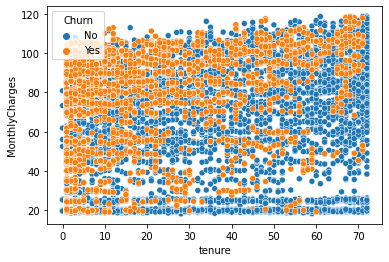

In [24]:
sns.scatterplot(data = df_oversampler, x='tenure', y='MonthlyCharges',hue = 'Churn')

* We run the model again, to test its accuracy

In [13]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.4, random_state=40)

classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=40,
                  multi_class='ovr').fit(X_train, y_train)

predictions = classification.predict(X_test)

accuracy_score(y_test, predictions)

0.721256038647343

* but this actually reduced the accuracy of the model.

**Under-sampling**  

Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

* For this we will import the method TomeLinks, and with it reample the data. We can see how the size of the dataframe is reduced

In [32]:
from imblearn.under_sampling import TomekLinks 

tl = TomekLinks()
X,y = tl.fit_resample(data[['tenure','MonthlyCharges','SeniorCitizen']],data['Churn'])
print ("X.shape =",X.shape,"y.shape =", y.shape)

X.shape = (6580, 3) y.shape = (6580,)


* Testing the model again, we can see that in this case the accuracy slightly improves!

In [16]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.4, random_state=40)

classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=60,
                  multi_class='ovr').fit(X_train, y_train)

predictions = classification.predict(X_test)

accuracy_score(y_test, predictions)

0.7898936170212766